In [1]:
import spacy
import textacy
import textacy.preprocessing
import textacy.resources
#import textacy.keyterms
#import textacy.ke
#import neuralcoref
from spacy.symbols import ORTH, POS, NOUN, VERB,PRON
import networkx as nx
from pyvis.network import Network
import matplotlib.pyplot as plt 
from nltk.corpus import wordnet
from nltk.stem.wordnet import WordNetLemmatizer
from nltk import word_tokenize, pos_tag
from networkx.readwrite import json_graph;
import json
from afinn import Afinn
afn = Afinn()
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet as wn
from nltk.corpus import sentiwordnet as swn
from nltk import sent_tokenize, word_tokenize, pos_tag
lemmatizer = WordNetLemmatizer()
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from sentistrength import PySentiStr
senti = PySentiStr()
senti.setSentiStrengthPath('D:/github/causal-graph-acquisition/SentiStrengthCom.jar')
senti.setSentiStrengthLanguageFolderPath('D:/github/causal-graph-acquisition/SentStrength_Data_Sept2011/')
import pandas as pd
from IPython.display import display
import collections
from pd_replicator import replicator

from transformers import AutoModelForSequenceClassification
from transformers import AutoTokenizer, AutoConfig
import numpy as np
from scipy.special import softmax
MODEL = f"cardiffnlp/twitter-xlm-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
config = AutoConfig.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)
#model.save_pretrained(MODEL)

# from allennlp_models.pretrained import load_predictor
# predictor = load_predictor("roberta-sst")
# predictor = load_predictor("glove-sst")

# from transformers import pipeline 
# MODEL = "cardiffnlp/twitter-xlm-roberta-base-sentiment"
# #semtiment_pipeline = pipeline("sentiment-analysis", model='cardiffnlp/twitter-roberta-base-sentiment-latest')
# semtiment_pipeline = pipeline("sentiment-analysis", model=model_path, tokenizer=model_path)

from nltk.corpus import stopwords
set(stopwords.words('english'))

from nltk.stem import PorterStemmer
ps = PorterStemmer()

nlp = spacy.load("en_core_web_sm")
#neuralcoref.add_to_pipe(nlp)

import inflect
m = inflect.engine()
from lemminflect import getInflection

from scipy.special import kl_div

import pysmile
pysmile.License((
	b"SMILE LICENSE b120d7f5 e03fbc6a 3007cd19 "
	b"THIS IS AN ACADEMIC LICENSE AND CAN BE USED "
	b"SOLELY FOR ACADEMIC RESEARCH AND TEACHING, "
	b"AS DEFINED IN THE BAYESFUSION ACADEMIC "
	b"SOFTWARE LICENSING AGREEMENT. "
	b"Serial #: 5pmgy44gtgzun5gqbh8o40u5n "
	b"Issued for: Solat Jabeen (solatjabeen@yahoo.com) "
	b"Academic institution: Institute of Business Administration "
	b"Valid until: 2024-08-17 "
	b"Issued by BayesFusion activation server"
	),[
	0x2c,0x65,0x6e,0x68,0x4d,0x79,0xf1,0x5d,0x62,0xd2,0xcc,0xab,0x2f,0x8d,0x6d,0xf7,
	0x40,0x38,0x7d,0xab,0xca,0x8e,0xf2,0x6a,0x80,0xb5,0xee,0xdd,0x44,0xcb,0x66,0x1d,
	0xd7,0x98,0xad,0x8f,0x76,0xa0,0x1c,0x7a,0x64,0xb0,0xfb,0x81,0x62,0xaf,0xd6,0x3f,
	0xb2,0x06,0x62,0x66,0xf9,0x5f,0x5a,0x62,0x74,0x39,0xd0,0x6b,0xf6,0x03,0xef,0x45])

In [2]:
dagCauseSents = []

edge1 = './Text/OPtoUSA.txt'
narrative = open(edge1, encoding="utf8").read()
narrative = textacy.preprocessing.normalize_quotation_marks(narrative)
narrative = narrative.lower()
dagCauseSents.append(narrative)

edge2 = './Text/FPPtoUSA.txt'
narrative = open(edge2, encoding="utf8").read()
narrative = textacy.preprocessing.normalize_quotation_marks(narrative)
narrative = narrative.lower()
dagCauseSents.append(narrative)

edge3 = './Text/GDPtoUSA.txt'
narrative = open(edge3, encoding="utf8").read()
narrative = textacy.preprocessing.normalize_quotation_marks(narrative)
narrative = narrative.lower()
dagCauseSents.append(narrative)

In [5]:
print(len(dagCauseSents))
for causalSentence in dagCauseSents:
    print(causalSentence)
    print()

3
with inflation easing on the back of lower oil prices and falling commodity prices has allowed rbi to lower interest rates, and further interest rate cuts cannot be ruled out, which would further boost the economic climate and consumer sentiment and create a positive demand environment for the auto sector. wholesale inflation fell 0.2 % in december, driven by lower gasoline prices. u.s. inflation dropped to 1.6 % in january due to lower fuel prices, hitting a 19-month low. u.s. consumer prices rose modestly last month, weighed down by falling gasoline prices. us consumer prices edge up just 0.1 % in january, weighed down by falling gasoline prices. data showed u.s. consumer prices were unchanged in november, in line with expectations, due to a sharp decline in gasoline price but underlying inflation pressures remained firm amid rising rents and healthcare costs. in june, we saw an inflation slowdown despite the spike in gasoline prices. additionally, higher crude prices tend to adver

Nodes: 4
Edges: 3


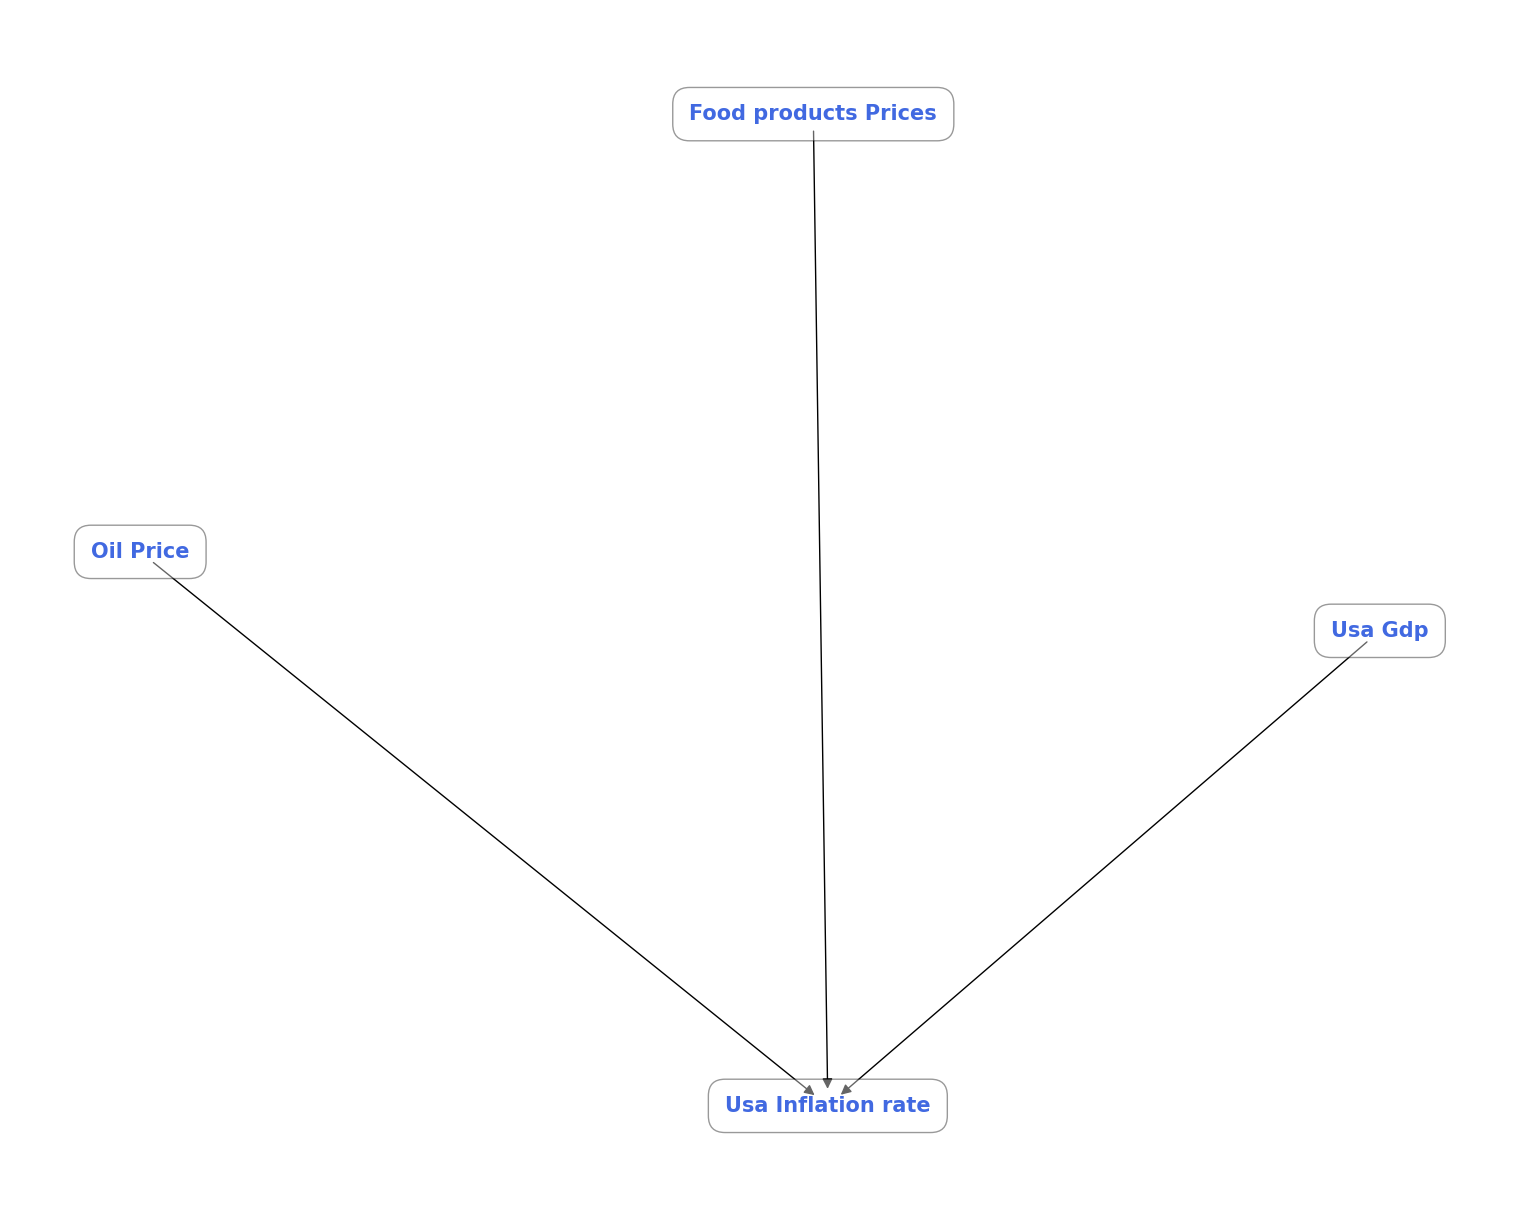

In [9]:
cg = nx.DiGraph()
cg.add_node("Usa Inflation rate",id = str("Usa Inflation rate"),title=str("Usa Inflation rate"),x=615,y=200)
cg.add_node("Oil Price",id = str("Oil Price"),title=str("Oil Price"),x=615,y=200)
cg.add_node("Food products Prices",id = str("Food products Prices"),title= str("Food products Prices"),x=615,y=200)
cg.add_node("Usa Gdp",id = str("Usa Gdp"),title=str("Usa Gdp"),x=615,y=200)

cg.add_edge("Oil Price", "Usa Inflation rate")
cg.add_edge("Food products Prices", "Usa Inflation rate")
cg.add_edge("Usa Gdp", "Usa Inflation rate")

print("Nodes:",len(cg.nodes))
print("Edges:",len(cg.edges))

pos = nx.spring_layout(cg, k=4, iterations=20)
plt.figure(figsize=(15,12))

nx.draw(cg, pos=pos, with_labels=True,  node_shape="s",  node_color="none", font_size=15,  font_color='royalblue', font_weight='bold',bbox=dict(facecolor="white", alpha=0.4,boxstyle='round,pad=0.8'),labels={node: node for node in cg.nodes()},arrows=True, arrowsize=15,width=1)
edge_labels = nx.get_edge_attributes(cg,'predicade')
nx.draw_networkx_edge_labels(cg, pos=pos, edge_labels = edge_labels, font_color='black',font_size=13)

plt.axis('off')
plt.show()

In [10]:
def Allen_sents_SentLevel(causalSentences):
    allen = []
    for sent in causalSentences:
        encoded_input = tokenizer(str(sent), return_tensors='pt')
        output = model(**encoded_input)
        scores = output[0][0].detach().numpy()
        scores = softmax(scores)
        if scores[0] > scores[1] and scores[0] > scores[2]:
            score = scores[0] * -1
            score = round(score,3)
            allen.append(score)
            # allen.append(-1)
        elif scores[2] > scores[1] and scores[2] > scores[0]:
            scores[2] = round(scores[2],3)
            allen.append(scores[2])
            # allen.append(1)
        else:
            # allen.append(scores[1])
            allen.append(0)
    return allen

In [11]:
#https://www.geeksforgeeks.org/python-sentiment-analysis-using-affin/

#output (Pos,neg,neural)
def Afinn_sents_SentLevel(causalSentences):
    afinn = []
    for sent in causalSentences:
        #print(sent)
        score = afn.score(str(sent))
        #print(score)
        if score < -5:
            score = -5
        elif score > 5:
            score = 5
        score = score/5
        score = round(score,3)
        afinn.append(score)
        # if score > 0:
        #     #print('positive')
        #     afinn.append(1)
        # elif score < 0:
        #     #print('negative')
        #     afinn.append(-1)
        # else:
        #     #print('neutral')
        #     afinn.append(0)
    return afinn

#for causalSentence, polarity  in zip(causalSentences, afinn):
#    print(causalSentence, polarity)

In [12]:
#https://github.com/cjhutto/vaderSentiment#about-the-scoring
#output (Pos,neg,neural)

def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    #print(vs)
    return vs['compound']

# def vader_analysis(compound):
#     #vader = []
#     if compound >= 0.05:
#         #vader.append(1)
#         return 1
#     elif compound <= -0.05 :
#         #vader.append(-1)
#         return -1
        
#     elif  compound > -0.05 and compound < 0.05:
#         #vader.append(0)
#         return 0
#     #return vader
    
def Vader_sents_SentLevel(causalSentences):
    vader = []
    for sent in causalSentences:
        #print(sent)
        #vaderTup = []
        compound = vadersentimentanalysis(str(sent))
        compound = round(compound,3)
        vader.append(compound)
        # res = vader_analysis(compound)
        #vaderTup.append(res)
        # vader.append(res)
    return vader

#vader = Vader_sents_SentLevel(causalSents)
#vader
#for causalSentence, polarity  in zip(causalSentences, vader):
#    print(causalSentence, polarity)

In [13]:
#http://sentistrength.wlv.ac.uk/
#http://paper.ijcsns.org/07_book/202001/20200107.pdf
#https://pypi.org/project/sentistrength/
#http://sentistrength.wlv.ac.uk/results.php?text=pakistan+must+support+army+and+aq+khan.&submit=Detect+Sentiment&result=trinary
#https://professorkhan.com/2019/03/29/sentiment-analysis-with-sentistrength/
#output (Pos,neg)

def Senti_sents_SentLevel(causalSentences):
    sentiStrength = []
    for sent in causalSentences:
        #print(sent)
        result = senti.getSentiment(str(sent), score='scale')
        #print(result)
        result = result[0]/4
        result = round(result,3)
        sentiStrength.append(result)
        # if result[0] > 0:
        #     sentiStrength.append(1)
        # elif result[0] < 0:
        #     sentiStrength.append(-1)
        # else:
        #     sentiStrength.append(0)
    return sentiStrength

#for causalSentence, polarity  in zip(causalSentences, sentiStrength):
#    print(causalSentence, polarity)

In [14]:
#df2 = pd.DataFrame([[38.0, 2.0, 18.0, 22.0, 21, 0,0],[19, 439, 6, 452, 226,232,0]],columns=['Causal Sentence','AllenNlp','Afinn','Vader','SentiStrength','Weight','Polarity'])

allen = Allen_sents_SentLevel(dagCauseSents)
afinn = Afinn_sents_SentLevel(dagCauseSents)
vader = Vader_sents_SentLevel(dagCauseSents)
sentiStrength = Senti_sents_SentLevel(dagCauseSents)

df_CSW = pd.DataFrame(list(zip(dagCauseSents, allen, afinn, vader,sentiStrength)), columns =['Causal Sentence', 'HuggingFace','Afinn','Vader','SentiStrength'])
# df2["Weight"] = round(df2.sum(axis=1)/4,3)

df_CSW["Weight"] = df_CSW.sum(axis=1)

for i in df_CSW.index:
    count = 0
#     print(df2["Afinn"][i])
    if df_CSW["HuggingFace"][i] != 0:
        count = count + 1
    if df_CSW["Afinn"][i] != 0:
        count = count + 1
    if df_CSW["Vader"][i] != 0:
        count = count + 1
    if df_CSW["SentiStrength"][i] != 0:
        count = count + 1
    if count == 0:
        count = 1
    df_CSW["Weight"][i] = round(df_CSW["Weight"][i]/count,3)

sentPolarity = []
sentsWeight_sentLevel = []

for index, row in df_CSW.iterrows():
    sentWeightTuple = []
    weight = row['Weight']
    sentWeightTuple.append(weight)
    sentsWeight_sentLevel.append(sentWeightTuple)
    #print(weight)
    if weight >= -1 and weight < -0.6:
        sentPolarity.append('Strong Negative') 
    elif weight >= -0.6 and weight < -0.3:
        sentPolarity.append('Moderate Negative')
    elif weight >= -0.3 and weight < 0:
        sentPolarity.append('Weak Negative')
    elif weight == 0:
        sentPolarity.append('Neutral')
    elif weight <= 1 and weight > 0.6:
        sentPolarity.append('Strong Positive')
    elif weight <= 0.6 and weight > 0.3:
        sentPolarity.append('Moderate Positive')
    elif weight <= 0.3 and weight > 0:
        sentPolarity.append('Weak Positive')

df_CSW["Polarity"] = sentPolarity
df_CSW.style

IndexError: index out of range in self

In [15]:
def GenerateTokens(causalSentences):
    marks = ['.',',','(',')','-',':',';','/',"'s",'_','__','--','"', '’', '—']
    tagsList = ['VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ']
    token_list = []
   
    for sent in causalSentences:
        tokens = word_tokenize(str(sent))
        tags = pos_tag(tokens)
        token_tuple = []
        for token,tag in tags:
            if str(token) not in marks:
                if str(token) not in stopwords.words() or tag in tagsList:
                    token_tuple.append(str(token))
        token_list.append(token_tuple)
    return token_list
        
#print(len(token_list))
#print(token_list)

In [16]:
def Allen_sents_TokenLevel(token_list):
    allen_word = []
    allen_tuple = []
    for tokenTuple in token_list:
        # print(tokenTuple)
        for token in tokenTuple:
            # print(token)
            encoded_input = tokenizer(str(token), return_tensors='pt')
            output = model(**encoded_input)
            scores = output[0][0].detach().numpy()
            scores = softmax(scores)
            if scores[0] > scores[1] and scores[0] > scores[2]:
                score = scores[0] * -1
                score = round(score,3)
                allen_tuple.append(score)
            elif scores[2] > scores[1] and scores[2] > scores[0]:
                scores[2] = round(scores[2],3)
                allen_tuple.append(scores[2])
            else:
                # allen_tuple.append(scores[1])
                allen_tuple.append(0)
        allen_word.append(allen_tuple)
        allen_tuple = []
    return allen_word

In [17]:
def Afinn_sents_TokenLevel(token_list):
    afinn_word = []
    afinn_tuple = []

    for tokenTuple in token_list:
        #print(sent)
        for token in tokenTuple:
            #if str(token) != ".": #or str(token) != ',' or str(token) != "-":
            #if str(token) not in marks:
                #print(token)
            score = afn.score(str(token))
            if score < -5:
                score = -5
            elif score > 5:
                score = 5
            score = score/5
            score = round(score,3)
            afinn_tuple.append(score)
            # if score > 0:
            #         #print('positive')
            #     afinn_tuple.append(1)
            # elif score < 0:
            #         #print('negative')
            #     afinn_tuple.append(-1)
            # else:
            #         #print('neutral')
            #     afinn_tuple.append(0)
        afinn_word.append(afinn_tuple)
        afinn_tuple = []
    return afinn_word

#for a in afinn_word:
#    print(len(a))
#    print(a)

In [18]:
def Vader_sents_TokenLevel(token_list):
    vader_word = []
    vader_tuple = []

    for tokenTuple in token_list:
        #print(sent)
        for token in tokenTuple:
            #if str(token) not in marks:
            vs = analyzer.polarity_scores(str(token))
            compound = vs['compound']
            compound = round(compound,3)
            vader_tuple.append(compound)
            # if compound >= 0.05:
            #     vader_tuple.append(1)   
            # elif compound <= -0.05 :
            #     vader_tuple.append(-1)
            # elif  compound > -0.05 and compound < 0.05:
            #     vader_tuple.append(0)
        vader_word.append(vader_tuple)
        vader_tuple = []
    return vader_word

#for a in vader_word:
#    print(len(a))
#    print(a)

In [19]:
def Senti_sents_TokenLevel(token_list):
    senti_word = []
    senti_tuple = []
    for tokenTuple in token_list:
        #print(sent)
        for token in tokenTuple:
            #if str(token) not in marks:
                #print(token)
            result = senti.getSentiment(str(token), score='scale')
                #print(result)
            result = result[0]/4
            result = round(result,3)
            senti_tuple.append(result)
            # if result[0] > 0:
            #     senti_tuple.append(1)
            # elif result[0] < 0:
            #     senti_tuple.append(-1)
            # else:
            #     senti_tuple.append(0)
        senti_word.append(senti_tuple)
        senti_tuple = []
    return senti_word
    
#for a in senti_word:
#    print(len(a))
#    print(a)

In [20]:
#new

token_list = GenerateTokens(dagCauseSents)
allen_word = Allen_sents_TokenLevel(token_list)
afinn_word = Afinn_sents_TokenLevel(token_list)
vader_word = Vader_sents_TokenLevel(token_list)   
senti_word = Senti_sents_TokenLevel(token_list)

sum_list = []
sum_tup = []
limit= len(dagCauseSents)

for i in range(0,limit):
    for j in range(0,len(allen_word[i])):
        count = 0
        if afinn_word[i][j] != 0: 
            count = count +1
        if vader_word[i][j] != 0:
            count = count +1
        if senti_word[i][j] != 0:
            count = count +1
        if allen_word[i][j] != 0:
            count = count +1
        if count == 0:
            count = 1
        res = allen_word[i][j]+afinn_word[i][j]+vader_word[i][j]+senti_word[i][j]
        res = res/count
        res = round(res,3)
        sum_tup.append(res)
    sum_list.append(sum_tup)
    sum_tup = []
    
def DetectPolarity(sum_list):
    tokenPolarity = []
    tokenPolarity_list = []
    for s in sum_list:
        for weight in s:
            if weight >= -1 and weight < -0.6:
                tokenPolarity.append('Strong Negative') 
            elif weight >= -0.6 and weight < -0.3:
                tokenPolarity.append('Moderate Negative')
            elif weight >= -0.3 and weight < 0:
                tokenPolarity.append('Weak Negative')
            elif weight == 0:
                tokenPolarity.append('Neutral')
            elif weight <= 1 and weight > 0.6:
                tokenPolarity.append('Strong Positive')
            elif weight <= 0.6 and weight > 0.3:
                tokenPolarity.append('Moderate Positive')
            elif weight <= 0.3 and weight > 0:
                tokenPolarity.append('Weak Positive')
        tokenPolarity_list.append(tokenPolarity)
        tokenPolarity = []
    return tokenPolarity_list

tokenPolarity_list = DetectPolarity(sum_list)

sentsWeight_TokenLevel = []
weightSumTup = []
for t in sum_list:
    tripleWeight = 0
    total = 0
    for w in t:
        tripleWeight = tripleWeight + w
    tripleWeight = round(tripleWeight, 3)
    if tripleWeight > 1: 
        tripleWeight = 1
    if tripleWeight < -1:
        tripleWeight = -1
    weightSumTup.append(tripleWeight)
    sentsWeight_TokenLevel.append(weightSumTup)
    weightSumTup = []

SentencePolarity_list = DetectPolarity(sentsWeight_TokenLevel)

    
df1 = pd.DataFrame(list(zip(dagCauseSents,token_list, allen_word, afinn_word,vader_word,senti_word,sum_list,tokenPolarity_list,sentsWeight_TokenLevel,SentencePolarity_list)), 
                      columns =['Causal Sentence', "Tokens", 'HuggingFace','Afinn','Vader','SentiStrength','Token Weight','Token Polarity','Sentence Weight','Sentence Polarity'])

df1 = df1.explode(['Tokens', 'HuggingFace','Afinn','Vader','SentiStrength','Token Weight', 'Token Polarity'], ignore_index=False)

prev = -1
for index, row in df1.iterrows():
    if prev == index:
        row['Causal Sentence'] = ""
        row['Sentence Weight'] = ""
        row['Sentence Polarity'] = ""
    prev = index
df1.style

,Causal Sentence,Tokens,HuggingFace,Afinn,Vader,SentiStrength,Token Weight,Token Polarity,Sentence Weight,Sentence Polarity
0,"with inflation easing on the back of lower oil prices and falling commodity prices has allowed rbi to lower interest rates, and further interest rate cuts cannot be ruled out, which would further boost the economic climate and consumer sentiment and create a positive demand environment for the auto sector. wholesale inflation fell 0.2 % in december, driven by lower gasoline prices. u.s. inflation dropped to 1.6 % in january due to lower fuel prices, hitting a 19-month low. u.s. consumer prices rose modestly last month, weighed down by falling gasoline prices. us consumer prices edge up just 0.1 % in january, weighed down by falling gasoline prices. data showed u.s. consumer prices were unchanged in november, in line with expectations, due to a sharp decline in gasoline price but underlying inflation pressures remained firm amid rising rents and healthcare costs. in june, we saw an inflation slowdown despite the spike in gasoline prices. additionally, higher crude prices tend to adversely affect inflation. furthermore, it was observed that despite higher oil prices, inflation in the external environment of the polish economy was moderate, and in the euro area it was low. inflation has been on an uptrend recently thanks mainly to higher oil prices. surging gasoline prices caused u.s. consumer prices to rise last month at the fastest pace since march. a few days ago, we discussed how soaring oil prices have been a stagflationary double whammy to emerging markets, which have been hit not only by a surging dollar, resulting in a collapse in local currencies and spiking import costs, but a spike in local currency oil and gasoline prices resulting in a surge in inflation and a slowdown in the economy as local infrastructure grinds to a halt.",inflation,0,0.000000,0.000000,-0.250000,-0.250000,Weak Negative,[-1],['Strong Negative']
0,,easing,-0.366000,0.000000,0.250000,0.000000,-0.058000,Weak Negative,,
0,,back,0,0.000000,0.000000,0.000000,0.000000,Neutral,,
0,,lower,0,0.000000,-0.296000,0.000000,-0.296000,Weak Negative,,
0,,oil,0,0.000000,0.000000,0.000000,0.000000,Neutral,,
0,,prices,0,0.000000,0.000000,0.000000,0.000000,Neutral,,
0,,falling,0,-0.200000,-0.153000,0.000000,-0.176000,Weak Negative,,
0,,commodity,0,0.000000,0.000000,0.000000,0.000000,Neutral,,
0,,prices,0,0.000000,0.000000,0.000000,0.000000,Neutral,,
0,,has,0,0.000000,0.000000,0.000000,0.000000,Neutral,,


In [21]:
sentencePolarity_list = []
sentWeight_TokenLevel = []
for i,j in zip (sentsWeight_TokenLevel,SentencePolarity_list):
    sentWeight_TokenLevel.append(i[0]) 
    sentencePolarity_list.append(j[0]) 
    
df_CST = pd.DataFrame(list(zip(sentWeight_TokenLevel, sentencePolarity_list)), columns =['Weight','Polarity'])
df_CST.style

,Weight,Polarity
0,-1,Strong Negative
1,-1,Strong Negative
2,-1,Strong Negative


In [22]:
weights = df_CST["Weight"].tolist()
polarities = df_CST["Polarity"].tolist()

Nodes: 4
Edges: 3
Oil Price , {'predicate': -1} , Usa Inflation rate
Food products Prices , {'predicate': -1} , Usa Inflation rate
Usa Gdp , {'predicate': -1} , Usa Inflation rate


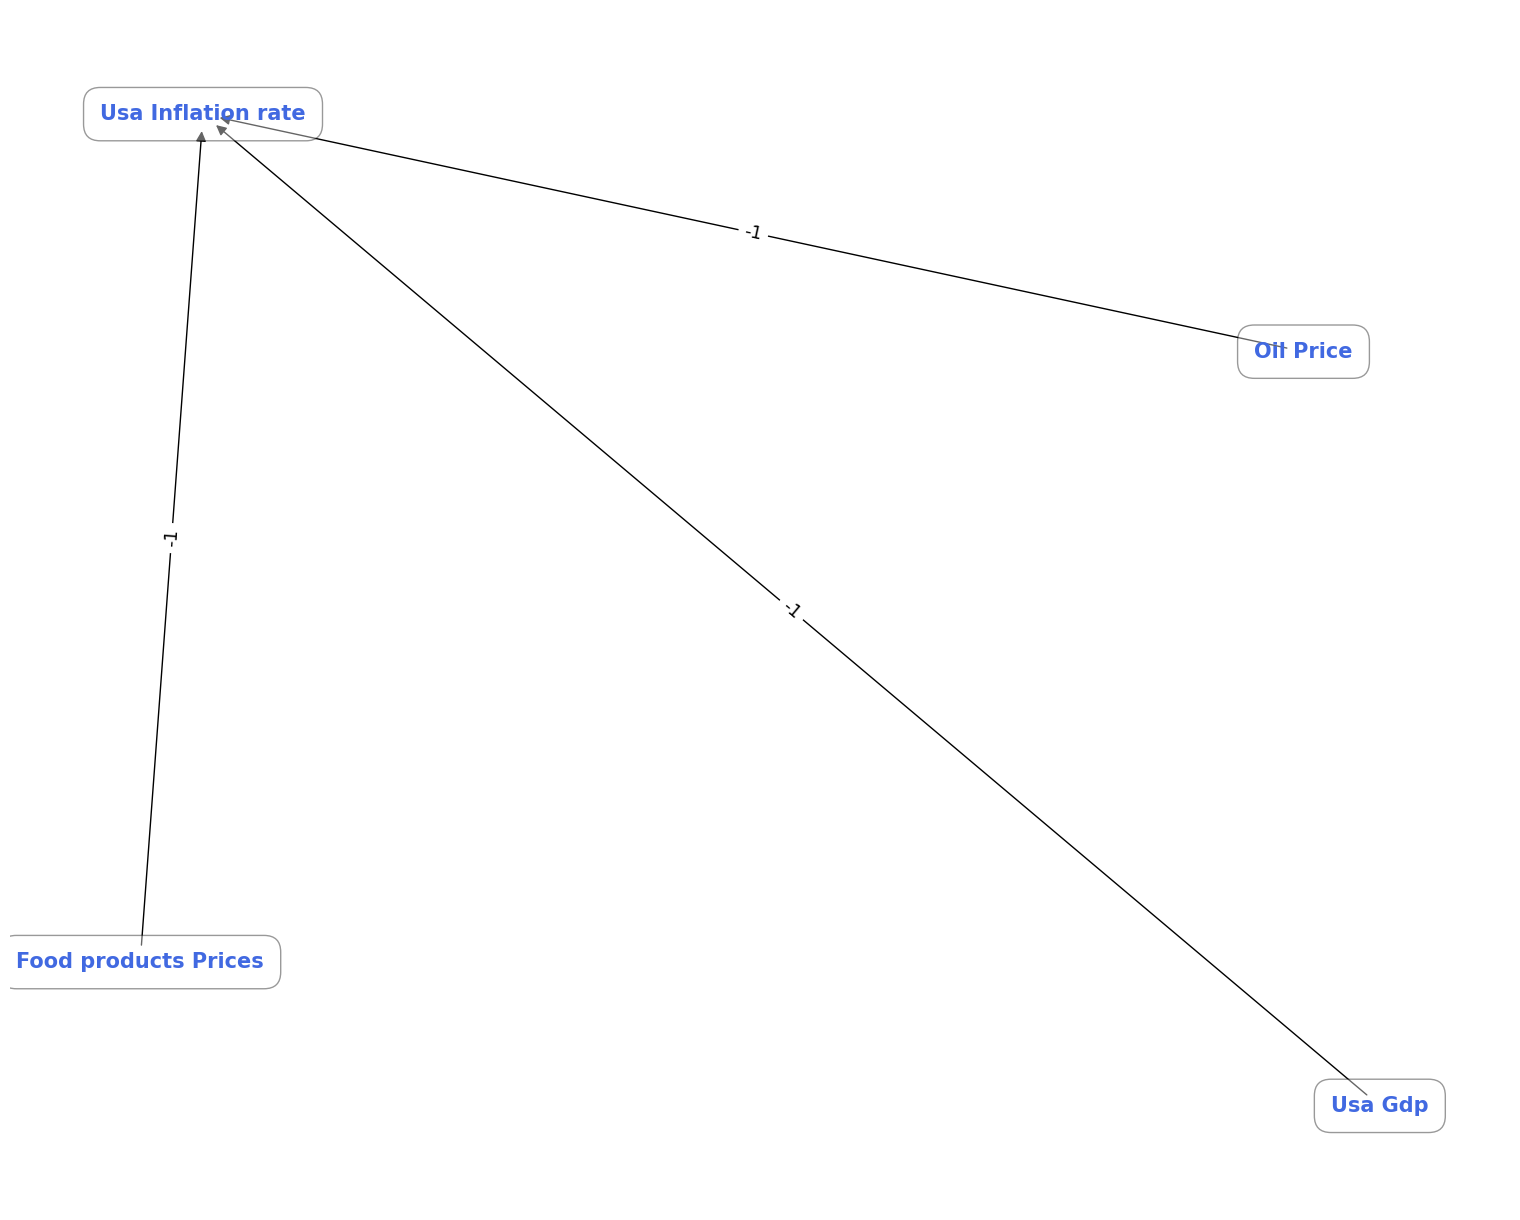

In [23]:
cwg = nx.DiGraph()


cwg.add_node("Usa Inflation rate",id = str("Usa Inflation rate"),title=str("Usa Inflation rate"),x=615,y=200)
cwg.add_node("Oil Price",id = str("Oil Price"),title=str("Oil Price"),x=615,y=200)
cwg.add_node("Food products Prices",id = str("Food products Prices"),title= str("Food products Prices"),x=615,y=200)
cwg.add_node("Usa Gdp",id = str("Usa Gdp"),title=str("Usa Gdp"),x=615,y=200)

cwg.add_edge("Oil Price", "Usa Inflation rate",predicate=-1)
cwg.add_edge("Food products Prices", "Usa Inflation rate",predicate=-1)
cwg.add_edge("Usa Gdp", "Usa Inflation rate",predicate=-1)

    
print("Nodes:",len(cwg.nodes))
print("Edges:",len(cwg.edges))

for e in cwg.edges(data=True):
    print(e[0],",",e[2],",",e[1])
    

pos = nx.spring_layout(cwg, k=4, iterations=20)
plt.figure(figsize=(15,12))

nx.draw(cwg, pos=pos, with_labels=True,  node_shape="s",  node_color="none", font_size=15,  font_color='royalblue', font_weight='bold',bbox=dict(facecolor="white", alpha=0.4,boxstyle='round,pad=0.8'),labels={node: node for node in cwg.nodes()},arrows=True, arrowsize=15,width=1)
edge_labels = nx.get_edge_attributes(cwg,'predicate')
#edge_labels2 = nx.get_edge_attributes(cwg,'polarity')
#edge_labels3 = nx.get_edge_attributes(cwg,'weight')

nx.draw_networkx_edge_labels(cwg, pos=pos, edge_labels = edge_labels, font_color='black',font_size=13)

plt.axis('off')
plt.show()

In [24]:
def FromTruthTable(i,inputs):
    count = 0

    if inputs==1:
        for a in range(1, -1, -1):
            if i == count:
                return (a)
            count = count+1

    if inputs==2:
        for a in range(1, -1, -1):
            for b in range(1, -1, -1):
                if i == count:
                    t = (a,b)
                    return t
                count = count+1
        
    elif inputs==3:
        for a in range(1, -1, -1):
            for b in range(1, -1, -1):
                for c in range(1, -1, -1):
                    if i == count:
                        t = (a,b,c)
                        return t
                    count = count+1
    
    elif inputs==4:
        for a in range(1, -1, -1):
            for b in range(1, -1, -1):
                for c in range(1, -1, -1):
                    for d in range(1, -1, -1):
                        if i == count:
                            t = (a,b,c,d)
                            return t
                        count = count+1

    elif inputs==5:
        for a in range(1, -1, -1):
            for b in range(1, -1, -1):
                for c in range(1, -1, -1):
                    for d in range(1, -1, -1):
                        for e in range(1,-1,-1):
                            if i == count:
                                t = (a,b,c,d,e)
                                return t
                            count = count+1
                            
    elif inputs==6:
        for a in range(1, -1, -1):
            for b in range(1, -1, -1):
                for c in range(1, -1, -1):
                    for d in range(1, -1, -1):
                        for e in range(1,-1,-1):
                            for f in range(1,-1,-1):
                                if i == count:
                                    t = (a,b,c,d,e,f)
                                    return t
                                count = count+1

class Tutorial1:
    #def __init__(self):
    def Add(self, net, id ,name, outcomes, x_pos, y_pos):
        e = self.create_cpt_node(net, id, name, outcomes, x_pos, y_pos)
        nodeNames.append(net.get_node_name(e))
        nodeIds.append(net.get_node_id(e))
        nodeHandles.append(e)
        net.write_file("./GeNie CBN/CBN.xdsl")
        
    def AddArcs(self, net, s, d):
        net.add_arc(s, d)
        net.write_file("./GeNie CBN/CBN.xdsl")

    def Addcpts(self, net, h, cpt):
        net. set_node_definition(h, cpt)
        net.write_file("./GeNie CBN/CBN.xdsl")
        
    def create_cpt_node(self, net, id, name, outcomes, x_pos, y_pos):
        handle = net.add_node(pysmile.NodeType.CPT, id)
        net.set_node_name(handle, name)
        net.set_node_position(handle, x_pos, y_pos, 85, 55)
        initial_outcome_count = net.get_outcome_count(handle)
        for i in range(0, initial_outcome_count):
            net.set_outcome_id(handle, i, outcomes[i])
        for i in range(initial_outcome_count, len(outcomes)):
            net.add_outcome(handle, outcomes[i])
        return handle
    
    def print_cpt_matrix(self, net, node_handle):
        cpt = net.get_node_definition(node_handle)
        return cpt
    

net = pysmile.Network()
obj = Tutorial1()
outcomes = ["True","False"]
nodeNames = []    
nodeIds = []
nodeHandles = []
# cpts=[]
PDs = []
baseline = 0.1
x = 160
y = 40

for node in cwg.nodes: 
    obj.Add(net, str(node),str(node), outcomes, x, y)
        
for e in cwg.edges():
    for id,name in zip(nodeIds,nodeNames):
        if name == e[0]:
            s = id
        if name == e[1]:
            d = id 
    obj.AddArcs(net, s, d)
    
for handle,name in zip(nodeHandles,nodeNames): 
    print("Handle:" + str(handle))
    print("Node:" + name)
    print(net.get_outcome_ids(handle))
    parent_ids = net.get_parent_ids(handle)
    num_parents = len(parent_ids)
    print("Number of Parents:" + str(num_parents))
    cpt = []
    parent_names = []
    totalCols = 1
    if num_parents == 0:
        cpt.append(baseline)
        cpt.append(1 - baseline)
        print("CPT:" + str(cpt))
        obj.Addcpts(net, handle, cpt)
        print("CPT from Network:")
        print(obj.print_cpt_matrix(net, handle))
        print("********************************************************************")
    elif num_parents > 0:
        for par in parent_ids:
                parent_names.append(net.get_node_name(par))
                totalCols = 2 ** num_parents
        print("Names of Parents:" + str(parent_names))
        print("totalCols:" + str(totalCols))
        for j in range(0, totalCols):
            print("j: "+str(j))
            PI = 1
            NI = 1
            ans = FromTruthTable(j,num_parents)
            print("From Dummy: "+str(ans))
            #for parent in parent_names:
            for p in range(0,len(parent_names)):
                for edge in cwg.edges(data=True):
                    if str(parent_names[p]) == str(edge[0]) and str(name) == str(edge[1]):
                        for nbr, eattr in edge[2].items():
                            if nbr == "predicate":
                                polarity = eattr
                        break
                print("Parent: " + parent_names[p])
                print("Polarity: " + str(polarity))
                print("p: "+str(p))
                if num_parents > 1:
                    if ans[p] == 0:
                        polarity = 0
                        print("New Polarity: " + str(polarity))
                else:
                    if ans == 0:
                        polarity = 0
                        print("New Polarity: " + str(polarity))
                if polarity >= 0:
                    #polarity = polarity/4
                    PI = PI * (1 - polarity)
                else:
                    #polarity = polarity/ (-4)
                    NI = NI * (1 - abs(polarity))
            PI = 1 - PI
            NI = 1 - NI
            AI = abs(PI - NI) / (1 - min(PI, NI))  
            CP = 0
            if PI > NI:
                CP = baseline + ((1 - baseline) * AI)
            elif PI < NI:
                CP = baseline - (baseline * AI)
            elif PI == NI:
                CP = baseline
            if CP == 0:
                CP = 0.01
            cpt.append(round(CP, 3))
            cpt.append(round((1 - CP), 3))
            pds = []
            pds.append(round(CP, 3))
            pds.append(round((1 - CP), 3))
            PDs.append(pds)
        print("CPT:" + str(cpt))
        obj.Addcpts(net, handle, cpt)
        print("CPT from Network:")
        print(obj.print_cpt_matrix(net, handle))
        print("********************************************************************")

Handle:0
Node:Usa Inflation rate
['True', 'False']
Number of Parents:3
Names of Parents:['Oil Price', 'Food products Prices', 'Usa Gdp']
totalCols:8
j: 0
From Dummy: (1, 1, 1)
Parent: Oil Price
Polarity: -1
p: 0
Parent: Food products Prices
Polarity: -1
p: 1
Parent: Usa Gdp
Polarity: -1
p: 2
j: 1
From Dummy: (1, 1, 0)
Parent: Oil Price
Polarity: -1
p: 0
Parent: Food products Prices
Polarity: -1
p: 1
Parent: Usa Gdp
Polarity: -1
p: 2
New Polarity: 0
j: 2
From Dummy: (1, 0, 1)
Parent: Oil Price
Polarity: -1
p: 0
Parent: Food products Prices
Polarity: -1
p: 1
New Polarity: 0
Parent: Usa Gdp
Polarity: -1
p: 2
j: 3
From Dummy: (1, 0, 0)
Parent: Oil Price
Polarity: -1
p: 0
Parent: Food products Prices
Polarity: -1
p: 1
New Polarity: 0
Parent: Usa Gdp
Polarity: -1
p: 2
New Polarity: 0
j: 4
From Dummy: (0, 1, 1)
Parent: Oil Price
Polarity: -1
p: 0
New Polarity: 0
Parent: Food products Prices
Polarity: -1
p: 1
Parent: Usa Gdp
Polarity: -1
p: 2
j: 5
From Dummy: (0, 1, 0)
Parent: Oil Price
Polari